In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import SGD

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

In [2]:
n_layer = 7
cmap = cm.get_cmap('rainbow', lut = n_layer+1)
units = [10]*n_layer

In [3]:
model_sig = Sequential()
model_sig.add(Flatten())
for layer_idx in range(n_layer - 1):
    model_sig.add(Dense(units = units[layer_idx], activation = 'sigmoid'))
model_sig.add(Dense(units = 10, activation = 'softmax'))

model_sig.build(input_shape = (None, 28, 28, 1))
model_sig.summary()

2022-02-18 19:49:21.507765: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 10)                7850      
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 10)                110       
                                                                 
 dense_3 (Dense)             (None, 10)                110       
                                                                 
 dense_4 (Dense)             (None, 10)                110       
                                                                 
 dense_5 (Dense)             (None, 10)                1

In [4]:
(train_dataset), dataset_info = tfds.load(name = 'mnist',
                                          shuffle_files = True,
                                          as_supervised = True,
                                          split = 'train',
                                          with_info = True)

In [5]:
def normalization(images, labels):
    images = tf.cast(images, tf.float32) / 255.0
    return [images, labels]
train_batch_size = 10
train_dataset = train_dataset.map(normalization).batch(train_batch_size)

train_dataset_iter = iter(train_dataset)
images, labels = next(train_dataset_iter)

In [6]:
loss_object = SparseCategoricalCrossentropy()
optimizer = SGD()

with tf.GradientTape() as tape:
    predictions = model_sig(images)
    loss = loss_object(labels, predictions)
    
gradients = tape.gradient(loss, model_sig.trainable_variables)

In [7]:
len(gradients) # 14; 7(num_layers) * 2(weight + bias)

14

In [8]:
gradients[3]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 6.0729231e-05,  4.8117818e-05, -6.1507526e-05, -3.0444182e-05,
       -1.0362760e-04, -8.0004284e-05,  6.4696801e-06, -6.5350382e-06,
       -8.8413610e-05,  4.4813150e-05], dtype=float32)>

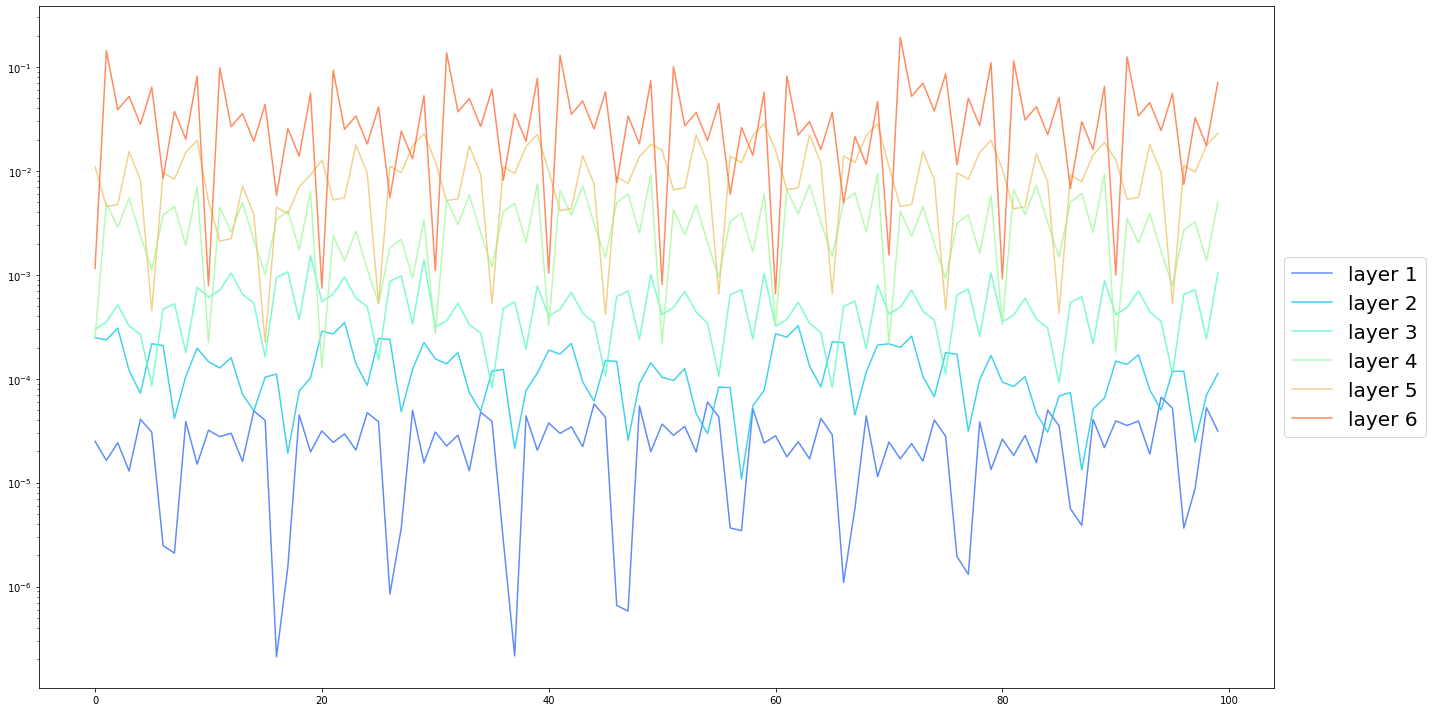

In [9]:
fig, ax = plt.subplots(figsize = (20, 10))
ax.set_yscale('log')
for grad_idx, grad in enumerate(gradients[::2]): # skip bias
    if grad_idx >= 1: # skip flatten layer
        grad_abs = np.abs(grad.numpy().flat)
        ax.plot(grad_abs, label = 'layer {}'.format(grad_idx), color = cmap(grad_idx), alpha = 0.8)
        
ax.legend(bbox_to_anchor = (1, 0.5), loc = 'center left', fontsize = 20)
fig.tight_layout()

In [10]:
model_relu = Sequential()
model_relu.add(Flatten())
for layer_idx in range(n_layer - 1):
    model_relu.add(Dense(units = units[layer_idx], activation = 'relu'))
model_relu.add(Dense(units = 10, activation = 'softmax'))

model_relu.build(input_shape = (None, 28, 28, 1))
model_relu.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_7 (Dense)             (None, 10)                7850      
                                                                 
 dense_8 (Dense)             (None, 10)                110       
                                                                 
 dense_9 (Dense)             (None, 10)                110       
                                                                 
 dense_10 (Dense)            (None, 10)                110       
                                                                 
 dense_11 (Dense)            (None, 10)                110       
                                                                 
 dense_12 (Dense)            (None, 10)               

In [11]:
with tf.GradientTape() as tape:
    predictions = model_relu(images)
    loss = loss_object(labels, predictions)
    
gradients_relu = tape.gradient(loss, model_relu.trainable_variables)

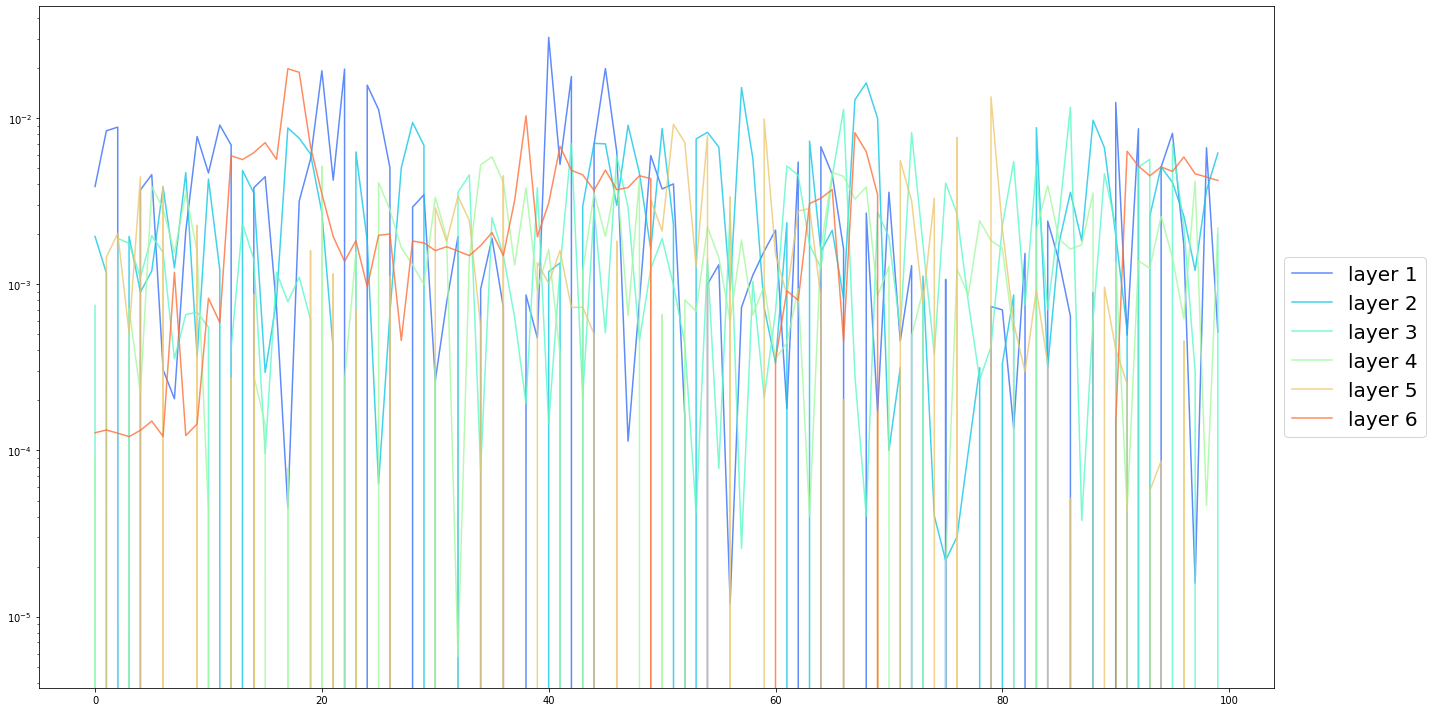

In [12]:
fig, ax = plt.subplots(figsize = (20, 10))
ax.set_yscale('log')
for grad_idx, grad in enumerate(gradients_relu[::2]):
    if grad_idx >= 1: # skip flatten layer
        grad_abs = np.abs(grad.numpy().flat)
        ax.plot(grad_abs, label = 'layer {}'.format(grad_idx), color = cmap(grad_idx), alpha = 0.8)
        
ax.legend(bbox_to_anchor = (1, 0.5), loc = 'center left', fontsize = 20)
fig.tight_layout()